In [2]:
from dask.distributed import LocalCluster, Client

cluster = LocalCluster()
client = cluster.get_client()

In [4]:
cluster.dashboard_link

'http://127.0.0.1:8787/status'

In [8]:
from dask import delayed, compute

@delayed
def stage_one_wrapper(*args):
    import subprocess
    subprocess.run(["python", "../task1.py", *map(str, args)], check=True)
    return args[-1]

@delayed
def stage_two_wrapper(infile, *args):
    import subprocess
    subprocess.run(["python", "../task2.py", infile, *map(str, args)], check=True)


intermediate_file = stage_one_wrapper(
    "/home/mu2so4/univ/disser/hpc2c-seismics/segy/00000215_276_22_14.18.0.sgy", 15, 30, 20, "filtered2.sd"
)
final_result = stage_two_wrapper(intermediate_file, 40, 50, "out_fin.png", "filtered.segy")


compute(final_result)

(None,)

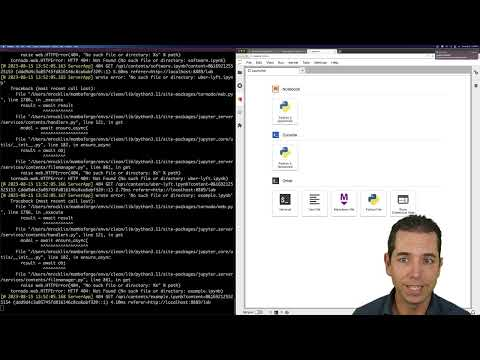

In [9]:
from IPython.display import YouTubeVideo

YouTubeVideo("C9yBc_eJxEc")